In [8]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

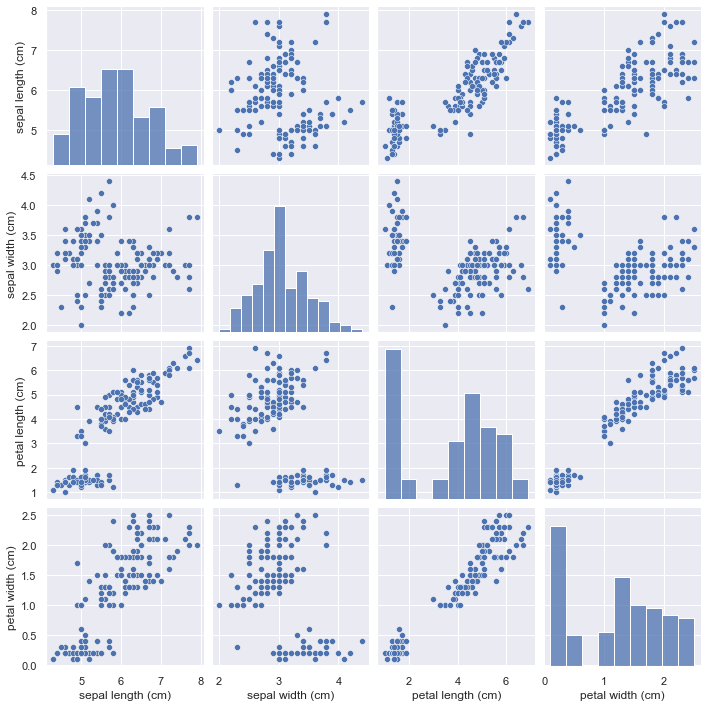

In [14]:
# using scatter plot to see the general overview and outliers:
import seaborn as sns
sns.set()

sns.pairplot(pd.DataFrame(iris.data, columns=iris.feature_names))

KNNeighbors -  there are two important parameters to the KNeighbors classifier: 

1) the number of neighbors

2) how you measure distance between data points (by default Euclidean distance is used)

important preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# before making the split function shuffles the dataset using a pseudorandom number generator
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=0)
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# evaluate model accuracy:
acc=model.score(X_test, y_test)
# another way: acc=np.mean(predictions==y_test)
acc # = 0.97 -> 97% of the flowers in the test set were predicted correctly

0.9736842105263158

The more complex we allow our model to be, the better we will be able to predict on the training data. However, if our model 
becomes too complex, we start focusing too much on each individual data point in our training set, 
and the model will not generalize well to new data.

the larger variety of data points your dataset contains, the more complex a model you can use without overfitting.
However, simply duplicating the same data points or collecting very similar data will not help.

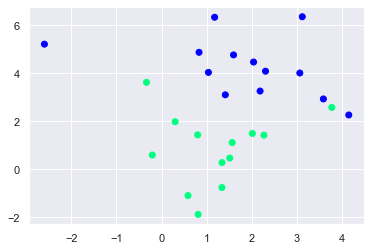

In [35]:
# *******************************************SUPERVISED LEARNING:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=26, centers=2, cluster_std=1.4, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')



In [41]:
# CLASSIFICATION - CANCER MALIGNANT OR BENIGN: 

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()
cancer.target_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [54]:
# how many samples contain each group

import numpy as np

x=zip(cancer.target_names,np.bincount(cancer.target))
list(x)

[('malignant', 212), ('benign', 357)]

In [76]:
# or:
import pandas as pd

df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df=pd.concat([df, pd.Series(cancer.target)], axis=1).rename(columns={0:'target'})
df.groupby('target')['target'].count()

target
0    212
1    357
Name: target, dtype: int64

In [131]:
# KNN - after training the dataset, for each test point there are extracted the closest neighbors 
# (its number id provided as a parameter) for each test point, we count how many neighbors belong to class 0 and 
# how many neighbors belong to class 1.  We then assign the class that is more frequent: 
# in other words, the majority class among the k-nearest neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)


In [132]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

acc= model.score(X_test, y_test)
acc

0.9230769230769231

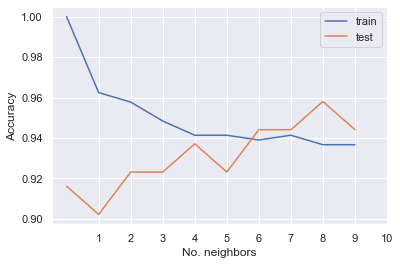

In [161]:
# comparing multiple neighbor numbers:
import seaborn as sns
sns.set()

neighbors=np.arange(1,11)
acc_test=np.empty(len(neighbors))
acc_train=np.empty(len(neighbors))

for i, j in enumerate(neighbors):
    model=KNeighborsClassifier(n_neighbors=j)
    model.fit(X_train, y_train)
    model.predict(X_test)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.xlabel('No. neighbors')
plt.ylabel('Accuracy')
plt.gca().set_xticks(neighbors)
plt.legend()

# Considering a single nearest neighbor, the prediction on the training set is perfect;
# using the single nearest neighbor leads to a model that is toocomplex. On the other hand, when considering 10 neighbors, 
# the model is too simple and performance is even worse.

REGRESSION  Regression is a statistical method  that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

x[0]->x[p] - denotes the features of a single data point
a and b - are parameters of the model that are learned,


- simple linear regression : uses one independent variable 'x' (one feature) to explain or predict the outcome of the dependent variable 'Y'
    y=ax +b

- multiple linear regression : uses two or more independent variables 'x' (multiple features) to predict the outcome of the dependent variable 'Y'

    y= a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b

- non-linear regression methods : when data shows a curvy trend, are a relationship between independent variables 𝑥 and a dependent variable 𝑦 which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear and is usually represented by the polynomial of 𝑘 degrees (maximum power of 𝑥).

    𝑦 =𝑎x³ +𝑏𝑥²+𝑐𝑥+𝑑

LINEAR REGRESSION = ORDINARY LEAST SQUARES (OLS),

Linear regression finds the parameters 'a' and 'b' that minimize the MEAN SQUARED ERROR between predictions and the true regression targets, y, on the training set.

MSE - is the sum of the squared differences between the predictions and the true values, divided by the number of samples.

a = slope = model.coef_ = is a NumPy array with one entry per input feature

b = intercept = model.intercept_ = is always a single float number

underscore at the end - scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore.

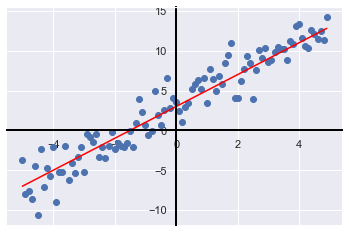

In [311]:
# SIMPLE LINEAR REGRESSION - EXAMPLE:
rng=np.random.RandomState(1)

x=np.arange(-5,5,0.1) # 100 items array
y=2*x +3

y_noise=2 * rng.normal(size=x.size)
y_data = y+y_noise

plt.scatter(x,y_data)
plt.plot(x, y, color='red')

plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')

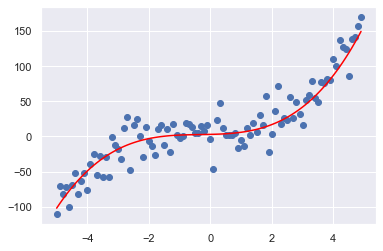

In [275]:
# NON-LINEAR REGRESSION:
y=1*(x**3) + 1*(x**2)+1*(x)+3 # 1D array 100 items
y_noise=20*rng.normal(size=x.size)
y_data=y+y_noise   # 1D array 100 items

plt.scatter(x, y_data)
plt.plot(x, y, color='red')

In [175]:
# KNN ALGORITHM:
# When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

from sklearn.neighbors import KNeighborsRegressor
# model.score returns R2 score = coeafficient of determination (0-1, 0=mean of the model, 1=perfect prediction)

line=np.linspace(-3,3,1000)
line=line[:, np.newaxis]
neighbors=[1,3,9]

# fig, axes = plt.subplots(1,3,figsize=(15,3))

# for i, ax in zip(neighbors, axes):
#     model=KNeighborsRegressor(n_neighbors=i)
#     model.fit(X_train, y_train)
#     ax.plot(line, model.predict(line))
#     ax.set_xlabel('Feature')
#     ax.set_ylabel('Target')


LINEAR MODEL = weighted sum of the input features -> weight=a:

y = ax + b  => one feature

for more features 'a' contains the slopes along each feature axis


There are many different linear models for regression. The difference between these models lies in how the model parameters a and b are learned from the training data, and how model complexity can be controlled.

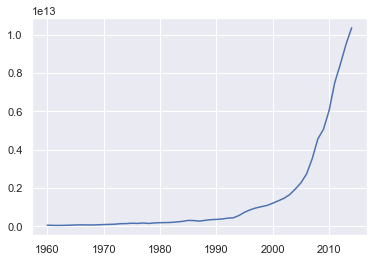

In [294]:
# Example - looking for a non linear model - dataset - annual gross domestic income in US dollars between the years 1960-2014

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv', index_col='Year')
plt.plot(df)

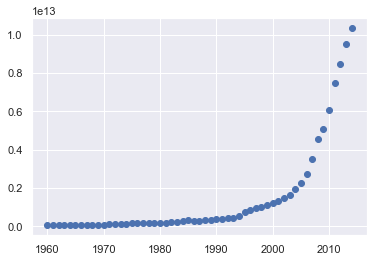

In [298]:
# or without year as an index:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv')
plt.plot(df.Year, df.Value, 'o')  # marker 'o' - default line

# the shape of a value column is similar to the logistic function

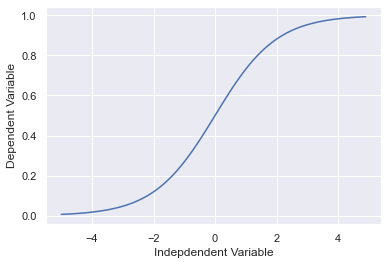

In [310]:
# the shape of above plot is similar to the logistic function:

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))  # np.exp = exponent e=constant =2.71828183 np.exp([1,2,3])=np.power(2.71828183, [1,2,3])
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [317]:
# LINEAR REGRESSION -BOSTON HOUSE PRICES:
from sklearn.datasets import load_boston

df=load_boston()
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [319]:
X, y = df.data, df.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [325]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model=LinearRegression()
model.fit(X_train, y_train)

print('Accuracy of the training set: ', model.score(X_train, y_train))
print('Accuracy of the test set: ', model.score(X_test, y_test))

# low discrepancy between performance of the training set and the test set is not a sign of overfitting, 
# in case of overfitting we should verify another regression algorithms which allow to control complexity e.g Ridge

Accuracy of the training set:  0.7697699488741149
Accuracy of the test set:  0.6354638433202145


In [335]:
# checking the prediction of the first element from the dataset

X_new = X[0, np.newaxis]
pred=model.predict(X_new)

print(f'The actual value (label) of the first element is {y[0]}, but model predicted: {pred[0]}')

The actual value (label) of the first element is 24.0, but model predicted: 30.460905933879054


RIDGE REGRESSION:

linear model for regression; 

the coefficients (a) are chosen not only so that they predict well on the training data, but also to fit an additional 
constraint = REGULARIZATION.

Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression
is known as L2 regularization

RIDGE REGRESSION'S goal is to achieve the magnitude of coefficients to be as small as possible; 
all entries of 'a' should be close to zero. Intuitively, this means each feature should have as little effect on the outcome 
as possible (which translates to having a small slope), while still predicting well

It's less complex model = worse performance on the training set, but better generalization.


ALPHA PARAMETER - determines how much importance the model places on SIMPLICITY versus TRAINING SET PERFORMANCE (worse performance on the training set = better generalization (simpler model)

The optimum setting of alpha depends on the particular dataset we are using.

INCREASING ALPHA = COEFFICIENTS move more TOWARD ZERO (=more restricted model, worse generalization, better training set performance)

In [337]:
from sklearn.linear_model import Ridge

model_ridge=Ridge()
model_ridge.fit(X_train, y_train)

print(f'Accuracy of the training set: {model_ridge.score(X_train, y_train)}\nAccuracy of the test set: {model_ridge.score(X_test, y_test)}')

Accuracy of the training set: 0.7678858330771393
Accuracy of the test set: 0.6266182204613853


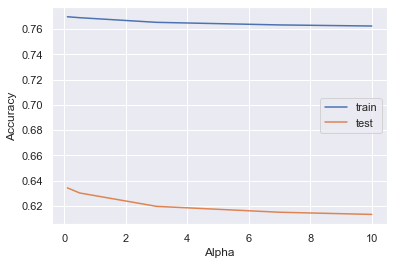

In [339]:
# COMPARING RIDGE ALGORITHM WITH THE DIFFERENT VALUES OF ALPHA PARAMETER:

alpha=[0.1, 0.5, 3, 7, 10]

acc_train=np.empty(len(alpha))
acc_test=np.empty(len(alpha))

for i, j in enumerate(alpha):
    model=Ridge(alpha=j)
    model.fit(X_train, y_train)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)

plt.plot(alpha, acc_train, label='train')
plt.plot(alpha, acc_test, label='test')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
# alpha 0.1 seems to provide the best result